In [6]:
import matplotlib_fontja  # 日本語フォントの表示崩れを防ぐ

# 3.3 ポアソン分布（Poisson Distribution）

このノートブックでは、統計学と確率論の重要な離散確率分布の一つであるポアソン分布について学ぶ。ポアソン分布は、一定時間や空間内で発生する「事象の回数」を表現するのに適した確率分布だ。

## 3.3.1 ポアソン分布の定義とイメージ

ポアソン分布は、「ある時間や場所の中で、何回くらい特定のことが起こるか」を表すための確率分布である。「確率分布」とは、「どんな値が、どれくらいの割合（確率）で出てくるか」をまとめたものだ。

たとえば、

- コンビニに1時間で何人お客さんが来る？
- 10ページの本で、各ページに印刷ミスがいくつ出る？
- サッカーの試合で、ゴールが何回決まる？

こんな、「ある決まった区切りの中で、”何回起きたか”を数えたい」場面で役立つのがポアソン分布である。

### 実生活での例と役に立つ場面

- **交通事故**：1日に交差点で発生する事故の件数
- **電話の着信**：1時間にコールセンターへかかってくる電話の回数
- **ウェブアクセス**：1分間にあるページを閲覧する人の数

これらは、いつどれくらい起こるかが完全には予測できない出来事だが、「過去の平均的な回数」を元に、おおよその「発生回数のばらつき」を知りたいときにポアソン分布を使う。

### ポアソン分布の特徴（イメージで理解）

1. **1回ずつバラバラに（独立して）起きる**  
　ある救急車がきた回数は、今度の回数に影響しない。つまり例えば、1分後にもう1回救急車が来るかには関係がない（独立）。

2. **起きるペースが急に変わらない**  
　朝でも夜でも、お店にお客さんが来る平均のペース（例: 1時間に10人）がずっと同じなら、使うことができる。

3. **「同じ時」にまとめてたくさん起こることはない**  
　たとえば、とても短い間隔なら普通は1回しか起きない（1秒間で2回信号が変わることはあり得ないイメージ）。

4. **観察する長さを2倍にすれば、起こる平均回数も2倍**  
　例えば、1時間で8回電話があるなら、2時間なら平均で16回となる。

#### 日常用語の解説

- **確率分布**：「どの数字がどれくらいの確率で出てくるか」を示したもの
- **事象（じしょう）**：「ある出来事」のこと。たとえば「お客さんが来る」「事故が起こる」など
- **平均発生回数 $\lambda$（ラムダ）**：だいたい1時間に何回起きるか、など
- **離散**：「1回・2回・3回…」と”数えられる数”のこと（0.5回のように途中の数字はNG）
- **独立**：「1回起きたからといって、次に起きることに影響しない」関係

---

### ポアソン分布と二項分布の違いと関係

「二項分布」という分布がある。これは「成功か失敗か」「当たりかハズレか」のような出来事を$n$回繰り返すとき、「何回当たるか」の確率分布である。

ポアソン分布は、この二項分布を「ものすごーく回数を多く」「1回ごとの当たる確率はすごく小さく」していったときの極端な場合（数学の”極限”）で出てくる。  

つまり、たとえば「道路を通る車がものすごくたくさんいて、信号無視する車の割合はとても小さい」といったケースのモデルになる。

このとき、

- 試行回数 $n$ がとても大きく（＝たくさんの人・車・チャンスがある）
- 1回ごとの成功確率 $p$ がとても小さく（＝1人が起こす確率は小さい）
- でも「全体で平均して $n \times p$ 回」は何かが起きる（＝この数を$\lambda$とする）

という条件がそろったとき、二項分布 $B(n, p)$ はポアソン分布 $Poi(\lambda)$ に近づく。

---

### まとめ

- ポアソン分布は、「”数えられる出来事”が、どれくらいのペースで発生するか」を考えるときの道具だ。
- 世の中で、「いつ・どれくらい起きるかよくわからないが、平均の回数はわかっている」現象を扱うのに使える。
- 初心者がイメージしやすいのは、「お客さんの来店数」「電話の着信数」「事故件数」など。
- 似た使い方をする「二項分布」との違いは、「回数が多くて確率が小さい極限」ではポアソン分布が便利という点だ。

## 3.3.2 ポアソン分布の確率の計算方法（確率質量関数：PMF）

### まず、「PMF」ってなに？

PMFは「確率質量関数（Probability Mass Function）」の略である。  
難しい言い方だが、一言で言うと「この数字が出る確率はいくら？」を求めるための“計算式”だ。

たとえば、「1時間でちょうど2人お客さんが来る確率は？」や「5分で1回も電話が鳴らない確率は？」のような“ぴったり何回”の確率を計算できる。

### ポアソン分布のPMFの式

ポアソン分布では、次の式を使って「事象が $k$ 回ちょうど起こる確率」がわかる。

$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, ...
$$

- $P(X = k)$：$k$回起きる確率
- $\lambda$（ラムダ）：平均的に1回の区切りで何回起こるか（「平均発生回数」。前回解説したパラメータ）
- $e$：ネイピア数（数学でよく出てくる定数。だいたい 2.71828）
- $k!$（かいじょう）：$k$ の階乗（下に詳しく解説）

#### 用語の補足（初心者向け）

- **確率質量関数（PMF）**  
  → ある特定の回数が「ちょうど出る」確率を計算する公式。サイコロで”3が出る確率”のように1つ1つの数字に対応した確率を出す。

- **ネイピア数（$e$）**  
  → 数学でたびたび出てくる有名な定数。「2.71828…」と続く無限小数。自然界や金融など、増えたり減ったりする現象でよく登場する。

- **階乗（$k!$）**  
  → たとえば「3の階乗」は、「3 × 2 × 1 = 6」のこと。「1からその数まで全部かけ算する」と覚えればOK。$0!$ も特別に「1」と決まっている。

---

### 階乗をもっと知ろう

階乗（$k!$）は、整数を「順番に全部かける」計算だ。たとえば：

- $0! = 1$　（ちょっと不思議だけど、ルールでそう決まっている）
- $1! = 1$
- $2! = 2 \times 1 = 2$
- $3! = 3 \times 2 \times 1 = 6$
- $4! = 4 \times 3 \times 2 \times 1 = 24$

---

### 実際に計算してみよう

たとえば、1時間あたり平均3人のお客さんが来るお店（$\lambda = 3$）を考える。

このとき、**ちょうど2人来る確率**はどうやって計算するか？

公式に数字を入れてみる。

$$
P(X = 2) = \frac{e^{-3} \times 3^2}{2!}
$$

計算の手順は：

1. $e^{-3}$ は $e$ の-3乗（$2.71828^{-3}$）でだいたい 0.0498
2. $3^2$ は $3 \times 3 = 9$
3. $2!$ は「2 × 1 = 2」
4. それぞれを掛けて割る：

$$
P(X = 2) = \frac{0.0498 \times 9}{2} = \frac{0.4482}{2} = 0.224
$$

つまり、「1時間にお客さんが2人だけ来る確率」は**約22.4%** になる。

---

### これが役に立つ場面

たとえば…

- コールセンターで1時間に何件の電話がくるかを予想したいとき
  
  「過去の記録から、1時間に平均して10本電話がかかってくる（$\lambda = 10$）と分かっている。  
  では、「ある1時間にピッタリ15本電話がかかってくる確率」は？  
  ⇒ PMF公式を使えば求められる。
- 製造工場で「1日に不良品がちょうど3個だけ出る」割合を知りたいとき

  「毎日平均して2個の不良品が出ている（$\lambda = 2$）」とすると、  
  「今日はピッタリ3個出る確率は？」が分かる。
- 病院で「1日に患者が5人ぴったり来ることはどれくらい珍しいか」を調べたいとき

  「1日平均5人の患者さんが来る」。  
  「今日はピッタリ5人来る確率は？」が計算できる。

つまり、「過去のデータなどから”平均で何回くらい”起こるか」が分かれば、  
ポアソン分布の式に当てはめて、「この日は（この時間は）ピッタリ○回起こることはどれくらい珍しい？」を知ることができる。

### 初心者向けミニ用語解説

- **平均回数（$\lambda$）**：ある区間で、だいたい何回くらい起こるかの目安。1時間あたり電話10本など。
- **ピッタリ$k$回**：まさにその回数だけ起こる場合。「2回だけ」や「4回だけ」というふうに、数字を指定。

このシンプルな情報２つで、日常や仕事のいろんな「予想・見積もり」ができるのがポアソン分布の強みである。

---

### まとめ 「ポアソン分布」は、次の２つの情報があれば使える

1. **一定期間（や範囲）中に、その出来事が平均して何回ぐらい起こるか（＝平均回数、$\lambda$：ラムダ）**
2. **その事象が、その期間に”ピッタリ何回”起きる確率を計算したい場合（$k$回）**

ポアソン分布のPMFは、「この区間で、ぴったりk回、物事が起こる確率」を計算する公式である。数字を入れて計算すれば、普段の暮らしのいろいろな「ちょうど何回？」の確率が分かる。一見難しそうだが“平均値”と“階乗”が分かれば公式はすぐ使えるため、実用性はとても高い。

<!-- ## 3.3.2 確率質量関数（PMF）

ポアソン分布の確率質量関数（PMF）は、「事象が $k$ 回発生する確率」を与える式である：

$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \ldots$$

ここで：
- $\lambda$ は平均発生回数（期待値）
- $e$ はネイピア数（自然対数の底）で約2.71828
- $k!$ は階乗（$k$ の階乗）

### 階乗とは

階乗（$k!$）とは、1から $k$ までの整数をすべて掛け合わせたものである：

$$k! = k \times (k-1) \times (k-2) \times \cdots \times 2 \times 1$$

例：
- $0! = 1$ （定義により）
- $1! = 1$
- $2! = 2 \times 1 = 2$
- $3! = 3 \times 2 \times 1 = 6$
- $4! = 4 \times 3 \times 2 \times 1 = 24$

### 計算例

例えば、1時間あたりに平均3人の客が来る店（$\lambda = 3$）で、ある1時間に2人の客が来る確率は：

$$P(X = 2) = \frac{e^{-3} \times 3^2}{2!} = \frac{e^{-3} \times 9}{2} = \frac{0.0498 \times 9}{2} \approx 0.224$$

つまり、約22.4%の確率で2人の客が来ることになる。 -->

## 3.3.3 期待値と分散（と標準偏差）のやさしい解説

ポアソン分布は「1区間あたり、だいたい何回くらい事象が起きるか」とその”ばらつき”が、一つの数字（$\lambda$）で表せる分布だ。
ここでは、よく出てくる「期待値」「分散」「標準偏差」の意味と、ポアソン分布の特徴を解説する。

---

### 期待値

**期待値**とは  
「平均してどれくらい起こるか？」という数字のことだ。

- ポアソン分布の場合：  
  $E[X] = \lambda$

たとえば：
- 1時間あたり平均10本電話がある→ 期待値は $10$
- 1日で平均2人の患者が来る→ 期待値は $2$

「平均値」と思ってほぼ問題ない。

---

### 分散

**分散**とは  
「どれくらい”バラバラ”な値が出るか？」をあらわす数字だ。

- 例：電話が毎回ぴったり5本というわけではなく、”5本だったり、3本だったり、7本だったり”と、どれだけ揺れるかを示すもの。

- ポアソン分布の場合は驚くほどシンプル  
  $Var[X] = \lambda$

つまり、「平均回数（$\lambda$）」が、そのまま”ばらつきの目安”にもなっている。

---

#### 用語の補足

- **期待値** … たくさん繰り返せば「だいたいこのぐらい」、という「中心となる値」。「平均値」と同じように考えて良い。
- **分散** … 一回ごとの数字が、期待値から”どれくらい離れるか”の平均的な度合い。“数字のブレ・ばらつき”の大きさを表現。

---

### 標準偏差（ひょうじゅんへんさ）

**標準偏差**は、分散を”平方根”した数字だ。  
「ばらつきの度合い」の実感のしやすいバージョンと思えばよい。

- 公式は $\sigma = \sqrt{\lambda}$

たとえば

- $\lambda = 4$ の場合
  - 標準偏差 $\sigma = \sqrt{4} = 2$
- $\lambda = 25$ の場合
  - 標準偏差 $\sigma = \sqrt{25} = 5$

---

### ここがポアソン分布のすごくおもしろいポイント！

**「平均値」と「分散」が同じになっている！**

つまり、$\lambda$ という1つの数字だけで

- 「だいたいこのくらい起こりそう」という“中心の値”も
- 「どのくらいバラつきそうか」という“ばらつき”の強さも

一緒に分かるのである。

---

#### 実例でイメージ

- コールセンターの平均が1時間に5本電話（$\lambda=5$）だったら
  - 平均も5本、分散も5
  - 標準偏差は $\sqrt{5} \approx 2.24$ 本　→平均からだいたい2本くらい増えたり減ったりすることが多い

---

### まとめ

- ポアソン分布では、「平均回数」と「ばらつきの大きさ」を、$\lambda$ ひとつでまとめて表せる
- 計算も簡単なので、どんな場面でもすぐに「中心」と「ばらつき」の両方を把握できて便利

<!-- ## 3.3.3 期待値と分散

ポアソン分布の期待値と分散は、どちらも $\lambda$ に等しいという特徴がある：

- **期待値**：$E[X] = \lambda$
- **分散**：$Var[X] = \lambda$

これは、ポアソン分布の最も特徴的な性質の一つである。例えば、1時間あたり平均5件の電話がかかってくるコールセンターでは、電話件数の期待値も分散も5になる。

### 標準偏差

標準偏差は分散の平方根なので：

$$\sigma = \sqrt{\lambda}$$

例えば、$\lambda = 4$ のポアソン分布の標準偏差は $\sqrt{4} = 2$ となる。 -->

## 3.3.4 ポアソン分布の可視化

異なる $\lambda$ 値でのポアソン分布の形状を可視化してみよう。

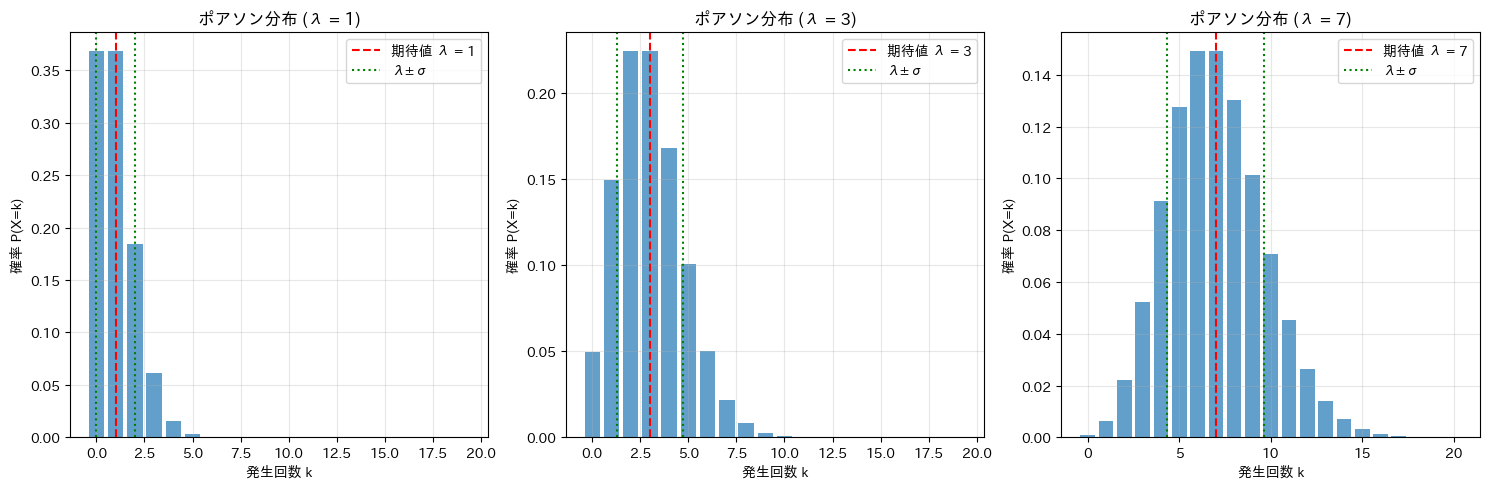

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

# -----------------------------------------------
# このコードの目的と意図
#
# 「ポアソン分布って、λ（平均値）が違うと、グラフの形がどう変わるの？」
# を、実際の棒グラフで示すためのコードである。
#
# 1つのグラフで1つのλ値（平均発生回数）について
# - 数字（例：1回・3回・7回）が平均だと、どこに山が来て、どれぐらい裾が広がるのか？
# - 標準偏差σで「どこまでが”よくある範囲”」か
# を可視化する
#
# 「λが小さいと0や1回ばかりで右に裾が延びる形」
# 「λが大きいほど、左右対称な”山”に近づいていく」
# というイメージを理解するためのサンプルコードである。
# -----------------------------------------------

# --- パラメータ設定 ---
# lambda_values: いくつのλ（平均発生回数）を可視化するかのリスト
# ポアソン分布の”平均発生回数”λの例（好きな値を設定できる。例：[1, 3, 10, 20] なども可）
lambda_values = [1, 3, 7]  # [小さいλ, 中くらい, 大きい]を並べると形の変化がよく分かる

plt.figure(figsize=(15, 5))  # 全体の図の大きさ（横15, 縦5インチ）

# --- λごとに1つずつサブプロットを作る ---
for i, lambda_val in enumerate(lambda_values):
    # --- 横軸k（回数）の範囲 ---
    # k_values: 発生回数を0,1,2,…,nまで並べる。最大値はλの3倍か20のどっちか大きい方
    # （λ=1なら0-20, λ=7なら0-21 くらいになる）
    k_values = np.arange(0, max(20, lambda_val * 3))
    
    # --- PMFを計算・棒グラフ化 ---
    # poisson.pmfは「k値（各回数）における確率」を配列で返す
    pmf_values = poisson.pmf(k_values, lambda_val)
    # pmf_valuesの中身例：[0.3679, 0.3679, 0.1839, ...]（確率の値）

    # --- サブプロット ---
    plt.subplot(1, 3, i+1)  # 1行3列のうちi+1番目
    plt.bar(k_values, pmf_values, alpha=0.7)  # 棒グラフで表示
    
    # --- 期待値（平均λ）の位置 ---
    # λの位置に赤い点線…グラフの”山”のピークがどこかが一目で分かる
    plt.axvline(lambda_val, color='r', linestyle='--', label=f'期待値 λ = {lambda_val}')
    
    # --- 標準偏差σの範囲 ---
    # 「よく出る範囲」を緑色の点線で
    # 期待値から -σ, +σ の2本
    std_dev = np.sqrt(lambda_val)
    plt.axvline(lambda_val - std_dev, color='g', linestyle=':', label=f'λ±σ')
    plt.axvline(lambda_val + std_dev, color='g', linestyle=':')
    # 例: λ=9なら、λ±σ=6,12付近（よく出る回数は9±3くらい）
    
    # --- 各サブグラフ（1つのλごと）の見た目 ---
    plt.title(f'ポアソン分布 (λ = {lambda_val})')  # グラフタイトル
    plt.xlabel('発生回数 k')    # 横軸：実際に起こる”回数”
    plt.ylabel('確率 P(X=k)')  # 縦軸：その回数”ぴったり”の確率
    plt.legend()               # 凡例に赤線/緑線の説明を出す
    plt.grid(alpha=0.3)        # 見やすいようにグリッド

plt.tight_layout()
plt.show()

# -----------------------------------------------
# 変数例
#   lambda_values    →  [2, 8, 16] など、好きな正の実数。
#   k_values         →  0, 1, ..., 24など整数（rangeはλに合わせて調整）
#   lambda_val       →  1/3/7 など順番に入る（float/intどちらもOK）
#   std_dev          →  sqrt(lambda_val)（例: sqrt(9)=3など）
#
# サンプルの工夫：
#  - λを大きくすると分布が左右対称（正規分布っぽい）に近づく
#  - λを小さくすると「0,1に集中」した片側に偏った形になる
#
# どの λ でもこのコードの仕組みは使える！
# -----------------------------------------------

上のグラフで観察できる特徴を、**身近な実世界の例**と結びつけて解説する。

---

1. **λが小さい（例：λ=1）のとき**
   - グラフを見ると、「0や1回」という結果にたくさんの確率が集まり、2回・3回と値が増えるにつれ、ぐーんと確率が下がっていく。
   - **実例**：「人気がまだない新しいカフェに、1時間あたりお客さんが“たった1人来るかどうか”」みたいな状況。  
     普通は誰も来ない、たま〜に1人来る、2人来ることは稀。ごくまれに3人以上来ることもありうるが、確率はとても小さい。
   - つまり、**「あまり起きない現象」**ほど、0や1に山ができて右側だけに裾を引くグラフ（「片側が伸びた」形）になる。

2. **λが中くらいに大きくなる（例：λ=3）とき**
   - グラフの「山」が0から離れて2や3回あたりに移動し、「2回」「3回」の確率が最も大きくなる。
   - しかしまだ片側（大きい回数側）に裾が引いていて、完全な山型ではない。
   - **実例**：「町の小さな病院で、夜間に1時間あたり3人ぐらい患者さんが来る」。  
     1人の日や5人の日もあるけれど、2〜3人の日（＝平均的な回数）が一番多い。

3. **λが大きい（例：λ=7）とき**
   - 山の部分が「中心（λ）」に集まり、左右が対称に近い「ベル型カーブ」になってくる。
   - これは、**正規分布（いわゆる“ガウス分布”や“平均値を中心に山になる分布”）**に形がよく似てくる現象である。
   - **実例**：「大手コンビニで、1時間に7人ぐらいお客さんが来る」  
     このくらい“たくさん来る”ケースだと
       - 3人しか来ないのは珍しい
       - 7人前後（5〜9人など）がよくあるパターン
       - 13人のような極端な数はほぼ起こらない
     …と、平均の周りに集まり、回数が多いほど“山型”で左右のバランスが良くなる。
   
---

#### まとめ

- **めったに起きない出来事（λが小さい）ほど、「起きない日」が多く、グラフの左側（0や1）に山ができる**
- **頻繁に起きる現象（λが大きい）ほど、「だいたい平均付近」に数が集中し、正規分布に似た左右対称の形になる**
- これが、ポアソン分布が世の中の「めったにないこと」から「よくあること」まで、現実を上手に表している理由である。

<!-- 上のグラフから、以下のことが観察できる：

1. $\lambda$ が小さい（$\lambda = 1$）とき、分布は0付近に集中し、右に裾を引く形になる。
2. $\lambda$ が大きくなるにつれて、分布は右に移動し、より対称的な形に近づく。
3. $\lambda$ が大きい（$\lambda = 7$）とき、分布は正規分布に似た形になる。

これは、ポアソン分布が $\lambda$ が大きくなると正規分布に近似できることを示している。 -->

## 3.3.5 ポアソン分布のシミュレーション

実際にポアソン分布に従う乱数を生成し、理論的な分布と比較してみよう。

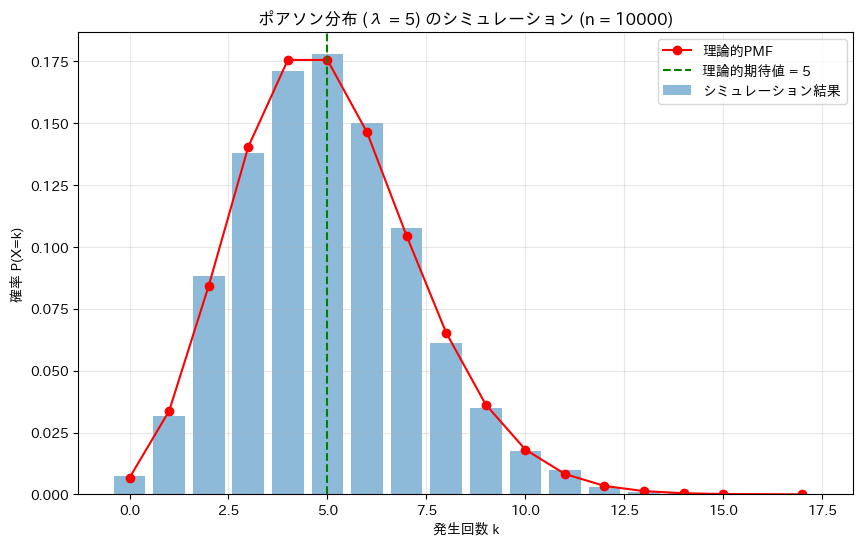

パラメータ: λ = 5

理論値と実験値の比較:
期待値: 理論値 = 5, 実験値 = 5.0005
分散: 理論値 = 5.0000, 実験値 = 5.0033


In [8]:
# ポアソン分布を「実際に乱数でシミュレーション」し、
# 「理論上の分布」と「実際のデータがどれくらい似ているか」を目で比べるためのコード例

# --- 1. ランダムの種を固定（同じ結果を毎回出すため。機械実験の再現性のため推奨） ---
np.random.seed(42)

# --- 2. パラメータ設定 ---
lambda_val = 5      # 平均発生回数λ（例：1時間に平均で5回起きる現象を想定）
n_samples = 10000   # 何回分サンプルを作るか（例：1時間を1万回観察した想定。大きい方が実験値がなめらかになる）

# --- 3. ランダムに「1区間で何回起きたか」のデータを作る ---
# np.random.poisson(λ, 回数)で、λ平均のポアソン乱数（kの値）がn_samples個できる
poisson_samples = np.random.poisson(lambda_val, n_samples)
# 例： [6, 7, 5, 7, 5, 4, ...] のような配列（各要素が「1回の観察で何回起きたか」）

# --- 4. 実データの頻度集計 ---
unique_values, counts = np.unique(poisson_samples, return_counts=True)
# unique_values：乱数で実際に出た「発生回数kの一覧」例:[0,1,2,...,13]
# counts：各kが何回出たか
empirical_pmf = counts / n_samples
# empirical_pmf：それぞれのkについて「実験で出た確率」（例：1万回中このkは何回だったか/1万）

# --- 5. 理論的なPMFの計算（公式で計算したもの）---
theoretical_pmf = poisson.pmf(unique_values, lambda_val)

# --- 6. 平均値/分散も理論値・実験値で比較 ---
theoretical_mean = lambda_val
theoretical_var = lambda_val
empirical_mean = np.mean(poisson_samples)
empirical_var = np.var(poisson_samples)
# → 乱数で得た標本平均・標本分散もデータから計算

# --- 7. グラフ描画（ヒストグラムとして比較もできる） ---
plt.figure(figsize=(10, 6))
plt.bar(unique_values, empirical_pmf, alpha=0.5, label='シミュレーション結果')
# 実際にサンプルから観測された確率
plt.plot(unique_values, theoretical_pmf, 'ro-', label='理論的PMF')
# 公式計算でのピンポイント確率（赤丸＆線）
plt.axvline(theoretical_mean, color='g', linestyle='--', label=f'理論的期待値 = {theoretical_mean}')
# 理論的な平均値（λ）に点線
plt.title(f'ポアソン分布 (λ = {lambda_val}) のシミュレーション (n = {n_samples})')
plt.xlabel('発生回数 k')    # 横軸：1回の観察で起きた回数
plt.ylabel('確率 P(X=k)')   # 縦軸：その回数が出る割合（確率）
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- 8. 理論値と実験値の数値比較をprintで出す ---
print(f"パラメータ: λ = {lambda_val}")
print("\n理論値と実験値の比較:")
print(f"期待値: 理論値 = {theoretical_mean}, 実験値 = {empirical_mean:.4f}")
print(f"分散: 理論値 = {theoretical_var:.4f}, 実験値 = {empirical_var:.4f}")

# -----------------------------------------
# ★ このコードで言いたいこと
# ・「ポアソン分布の公式の形」と
#   「実際に乱数でデータを作って何回も試してみた結果」とが
#   ほとんど一致することを、グラフ＆数値で体感できる。
# ・シミュレーションの回数を増やすほど（n_samplesを大きくするほど）
#   実験値と理論値の違いはどんどんなくなる！
# ・実用のイメージ例：
#    - λ=病院への平均救急車件数としたとき、何回来たパターンがよく出るか本当に知りたい
#    - PMFの形が頭では分かりにくい時、こうやってグラフ化すると直感的に分かる
#    - 理論値（公式）で十分な場合と、現実のデータや乱数サンプルで確認したい場合の"橋渡し"になる
# -----------------------------------------

## 3.3.6 ポアソン分布の「実世界での使いどころ」

ポアソン分布は「〇〇の区間に、ピッタリ何回起きるかの確率」を計算するための便利な道具だ。  
日常から科学、社会のさまざまな分野で登場する。

---

### 1. 顧客サービス・待ち行列理論

身近な例がたくさんある。「お客さんがいつ来るか」は予測が難しいが、  
「平均してこのくらい来る」というデータがあれば、ポアソン分布で次のようなことができる。

- **銀行やレストランへの客の到着**  
  例：1時間で平均10人来る店。「1時間後ぴったり8人来る確率」「誰も来ない日がどれくらいまれか」など。
- **コールセンターへの電話**  
  10分間あたりの問い合わせ件数を知りたい場合。
- **ウェブサイトへのアクセス**  
  1分ごとに何回アクセスがあるか。イベント時など「アクセス過多」のリスク管理にも使える。

**用語ミニ解説：待ち行列理論**  
「人や物が順番待ちする現象（銀行やレジでの行列など）を、数学的に研究する分野」

---

### 2. 品質管理・製造

工場や生産現場でも不可欠。

- **製品の欠陥数**  
  工場の”1バッチ”（1度にまとまって作った分）で不良品がいくつ出るか。
- **印刷ミスの数**  
  本1ページ内の誤字・印刷エラーの個数。
- **機械の故障回数**  
  1ヶ月にどれだけ不調が起こりうるか、保守点検の計画目安にもなる。

---

### 3. 生物学・医学

「滅多に起きないが、起きる回数を知りたい」出来事に強い。

- **細胞中の特定分子の数**  
  顕微鏡写真1枚に”特定の分子”が何個あるか。
- **突然変異の発生**  
  DNAの決まった部分に”1年で何回”変化が入るか予想する。
- **疫学調査**  
  町内会や都市、特定地域で”一定期間内”に病気の新規発生ケース数。

---

### 4. 物理学・天文学

とても小さな世界や宇宙でもポアソン分布は活躍する。

- **放射性崩壊**  
  センサーで「1分間に何個アルファ粒子を検出するか？」。
- **宇宙線の検出**  
  宇宙から飛んでくる粒子が、観測装置に1時間で何個当たるか。
- **星の分布**  
  ある領域に何個の星が存在しているか（稀な現象ほどポアソン分布がぴったり合う）。

---

### 5. 保険・リスク管理

「滅多にないけど、起こると大きな損失」なリスク評価で大活躍。

- **事故発生数**  
  交差点で1日に起きる交通事故の件数を調べたいとき。
- **保険請求**  
  1週間でどれくらいの人が保険金を請求するか。
- **自然災害**  
  10年に1度、地震や大雨が何回発生するか。非常時対応のリスク試算になる。

---

### ポアソン分布の「使えるところ」まとめ

- 出来事が「ふだんは少ない or バラバラ」「でも平均値は分かる」場面で本領を発揮する
- 「1区間でちょうど〇回起きる」、「全く起こらないのはどのくらい珍しい？」など、**ピンポイントの予想**ができる
- 様々な分野で「予測・計画・リスク管理」に活用できる

**つまり、世の中の「回数を数える」さまざまな現象が、ポアソン分布でぐっと”見える化”できる。**

## 3.3.7 ポアソン分布を使っていい場面（適用できる条件）

ポアソン分布はとても便利だが、**なんでもかんでも当てはまるわけではない。**  
「ポアソン分布を使っていいかどうか」のチェックポイントがいくつかある。  
初心者にもわかりやすく、身近な例をまじえて説明する。

---

### 1. **出来事どうしが「お互いに無関係」であること（独立性）**

- **意味：**  
  ある出来事が起きても、他の出来事が起きやすくなったり起きにくくなったりしない。
- **実例：**  
  「1人目のお客さんが来たから、次の人も連れて来る」だと独立じゃない。
  「今日5人来ても、次に来る人の確率は変わらない」ならOK。

- **注意！**  
  イベント終了間際で「1人来たらもう入場できない」という状況などはNG（お互い影響しあっている）。

#### 用語プチ解説  
- **独立（どくりつ）**：「お互いに影響を与えない」のこと

---

### 2. **「平均して起こるペース」がずっと変わらないこと（定常性・一定率）**

- **意味：**  
  観察する間じゅう、出来事が起きる“平均的な回数（λ）”が変わらない
- **実例：**  
  毎時5人ずつコンビニに来る ⇒ OK  
  昼は10人/時、夜は1人/時 ⇒ NG（1日を通して一定でなければダメ）

- **注意！**
  短い区切り（例：同じ時間帯/同じ条件）の中で使うことがポイント。  
  「朝だけの来客」「繁忙期だけのデータ」みたいに分ければ使える場合も。

---

### 3. **「同時に起きる」ことがほぼない（同時発生なし）**

- **意味：**  
  本当に小さな時間・場所の枠で見たとき、「同じ一瞬に2回同時に起きる」はほとんどない、と思えること。
- **実例：**  
  1秒間に2台のバスがピッタリ同時に到着する…なんてことはまずない。  
  お客さんや電話も「ほぼ同時」はめったにない。

- **注意！**  
  大ざっぱに”確率が小さい”なら使って良い。

---

### 4. **「起きる回数に理論上の上限がない」（多くてもOK）**

- **意味：**  
  たくさん起きても困らない。理論上は「100回でも1000回でも」無限にOK（現実は物理的な制約はあるけど！）。
- **実例：**  
  お店の最大定員が100人でも、数理モデルとしては「いくらでも来てもよい」と仮定する。  
  宇宙線の粒子数なども、現実の世界で上限は測りきれないくらい。

---

### まとめ

- **お互いに影響しない**
- **発生ペースが区間全体で同じ**
- **同時にたくさん起きない**
- **理論上はいくらでも起こりうる**

→ この4つがそろえば、ポアソン分布で「回数の確率」を自信をもって予測できる！

**初心者ポイント**  
現実のデータがこの条件に合っているかどうか「まずチェックする」のが大事。  
合っていなければ「もうちょっと違うモデル（分布）」を探そう、という姿勢がプロっぽさの第一歩！

## 3.3.8 まとめ

ポアソン分布は、一定時間・空間内での事象発生回数を表現する重要な確率分布である。以下の特徴を持つ：

- パラメータ $\lambda$ （平均発生回数）のみで特徴づけられる
- 期待値と分散がともに $\lambda$ に等しい
- $\lambda$ が大きくなると正規分布に近づく
- 顧客到着、故障発生、放射性崩壊など多くの自然現象や社会現象のモデル化に適している

ポアソン分布は、特に「稀に起こる事象」の回数を扱う場面で非常に有用な確率モデルである。